In [66]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [67]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [68]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
df.shape

(42000, 785)

In [70]:
df['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [71]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9300,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
import matplotlib.pyplot as plt

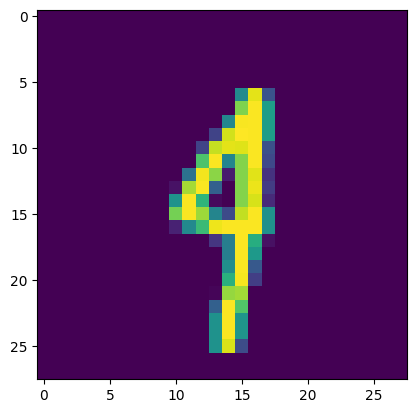

In [73]:
plt.imshow(df.iloc[14530,1:].values.reshape(28,28))

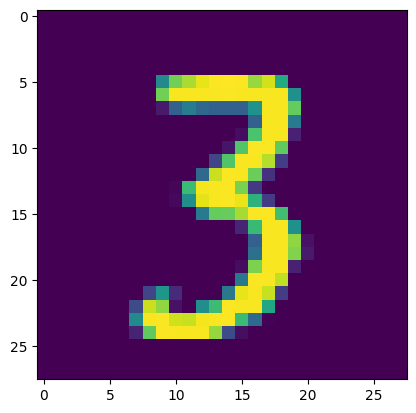

In [74]:
plt.imshow(df.iloc[19690,1:].values.reshape(28,28))

In [75]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [76]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)

In [77]:
X_train.shape

(33600, 784)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

In [79]:
knn = KNeighborsClassifier()

In [80]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [81]:
import time
start = time.time()
y_pred = knn.predict(X_test)  #it will take a hell lot of time here 
print(time.time() - start)

13.696033716201782


In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [83]:
# now here we will use the PCA

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [86]:
X_train  #Mean Centering

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [87]:
#PCA
from sklearn.decomposition import PCA

In [88]:
pca = PCA(n_components = 100)

In [89]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [90]:
X_train_trf.shape

(33600, 100)

In [91]:
X_train_trf

array([[-2.71863539, -0.48982364,  1.13547698, ..., -0.88445095,
         0.67889183,  0.38722834],
       [-0.67698071, -6.75362892, -2.3358968 , ...,  0.83123319,
         1.03235949, -1.28406698],
       [-3.03323426,  6.5098102 ,  7.49182693, ...,  0.47213716,
        -1.68661017, -0.41037073],
       ...,
       [ 2.14883836,  0.78079906, -0.74740495, ...,  1.10140272,
        -0.2176315 , -1.57640784],
       [ 1.05957237,  0.94766281,  3.94972217, ...,  0.90785121,
         0.69535066,  0.92177059],
       [17.70258598,  1.96187023, -4.94356851, ...,  0.14409004,
         0.5645352 ,  0.85396647]])

In [92]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)

KNeighborsClassifier()

In [93]:
y_pred = knn.predict(X_test_trf)

In [94]:
accuracy_score(y_test,y_pred)

0.9538095238095238

In [95]:
# L = []
# for i in range(1,3):
#     pca = PCA(n_components = i)
#     X_train_trf = pca.fit_transform(X_train)
#     X_test_trf = pca.transform(X_test)
#     knn = KNeighborsClassifier()
#     knn.fit(X_train_trf,y_train)
#     L.append(accuracy_score(y_test,y_pred))
# print(L)    

In [96]:
#transforming in to the 2D system here
pca = PCA(n_components = 2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)


In [97]:
X_train_trf

array([[-2.71862474, -0.49066581],
       [-0.67696307, -6.75175984],
       [-3.03323423,  6.50890172],
       ...,
       [ 2.14882429,  0.7814335 ],
       [ 1.05956703,  0.94651337],
       [17.7025923 ,  1.96261266]])

In [99]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

In [101]:
#transforming in to the 3D system here
pca = PCA(n_components = 3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [102]:
X_train_trf

array([[-2.71863352, -0.4898762 ,  1.13581311],
       [-0.67699593, -6.75360907, -2.33700406],
       [-3.03322267,  6.50982349,  7.49232782],
       ...,
       [ 2.14883831,  0.78072261, -0.74714941],
       [ 1.05957331,  0.94764801,  3.95028111],
       [17.70259378,  1.96205242, -4.94382507]])

In [104]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig.show()

In [106]:
#pca attributes
#explained_variance

pca.explained_variance_
# Eigen values this are (lambda)

array([40.67111198, 29.170234  , 26.74459568])

In [107]:
pca.components_

array([[ 1.72779909e-18,  1.29033961e-19,  1.00940761e-19, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 1.12473462e-16, -2.26161676e-18,  2.91932711e-18, ...,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [-1.79093680e-16,  6.00424244e-18, -6.58746137e-18, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [108]:
pca.components_.shape

(3, 784)

In [110]:
pca.explained_variance_ratio_*100

array([5.78519225, 4.14926968, 3.80423893])

In [112]:
#optimum number of PCs
pca = PCA(n_components = None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [115]:
pca.explained_variance_.shape

(784,)

In [118]:
#eigenvectors
pca.components_.shape

(784, 784)

In [120]:
pca.explained_variance_ratio_*100

array([5.78519225e+00, 4.14926968e+00, 3.80423901e+00, 2.96626277e+00,
       2.58156168e+00, 2.25498018e+00, 1.97306802e+00, 1.77527998e+00,
       1.56865066e+00, 1.43606328e+00, 1.37025484e+00, 1.22725500e+00,
       1.14691200e+00, 1.12302739e+00, 1.05852885e+00, 1.01993106e+00,
       9.57676152e-01, 9.42708817e-01, 9.12489429e-01, 8.90170190e-01,
       8.39940495e-01, 8.20063196e-01, 7.85303229e-01, 7.56739707e-01,
       7.37261022e-01, 7.01884653e-01, 6.97919728e-01, 6.71104483e-01,
       6.39845030e-01, 6.30337291e-01, 6.15350848e-01, 6.02388659e-01,
       5.83673972e-01, 5.78547759e-01, 5.72333148e-01, 5.46399774e-01,
       5.43207369e-01, 5.28172755e-01, 5.13381744e-01, 4.94015474e-01,
       4.87671103e-01, 4.81978768e-01, 4.68204430e-01, 4.59342487e-01,
       4.57660834e-01, 4.49219022e-01, 4.44682221e-01, 4.41540749e-01,
       4.35111936e-01, 4.32032928e-01, 4.21808870e-01, 4.18243127e-01,
       4.07994349e-01, 4.02004913e-01, 3.98335855e-01, 3.94598812e-01,
      

In [123]:
import numpy as np
a = np.cumsum(pca.explained_variance_ratio_*100)

In [128]:
len(a[a <= 90])

222

In [129]:
a[a <= 90]

array([ 5.78519225,  9.93446193, 13.73870094, 16.70496371, 19.2865254 ,
       21.54150558, 23.5145736 , 25.28985357, 26.85850424, 28.29456752,
       29.66482235, 30.89207736, 32.03898935, 33.16201674, 34.22054559,
       35.24047664, 36.1981528 , 37.14086161, 38.05335104, 38.94352123,
       39.78346173, 40.60352492, 41.38882815, 42.14556786, 42.88282888,
       43.58471353, 44.28263326, 44.95373775, 45.59358278, 46.22392007,
       46.83927092, 47.44165957, 48.02533355, 48.6038813 , 49.17621445,
       49.72261423, 50.2658216 , 50.79399435, 51.30737609, 51.80139157,
       52.28906267, 52.77104144, 53.23924587, 53.69858836, 54.15624919,
       54.60546821, 55.05015043, 55.49169118, 55.92680312, 56.35883605,
       56.78064492, 57.19888804, 57.60688239, 58.00888731, 58.40722316,
       58.80182197, 59.18869358, 59.57188877, 59.94844139, 60.32263485,
       60.68748701, 61.04828955, 61.402176  , 61.75011736, 62.09444078,
       62.43237831, 62.76736846, 63.09937666, 63.42625746, 63.74

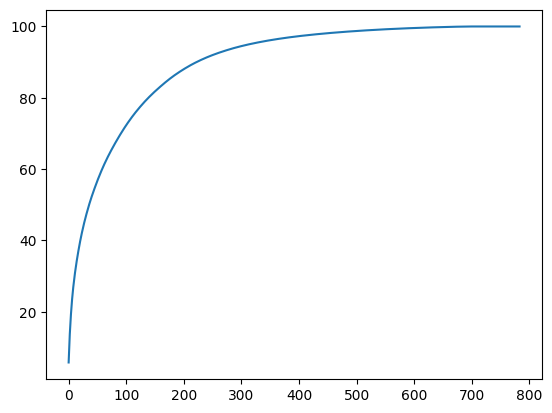

In [130]:
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))